In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import datetime
import random

from matplotlib.animation import FuncAnimation
from IPython import display

In [3]:
def coupled_vdp(t, x, eps, k):
    X1, Y1, X2, Y2 = x
    return [Y1, -eps*(X1*X1 - 1)*Y1 - X1 - k*(X1 - X2), Y2, -eps*(X2*X2 - 1)*Y2 - X2 - k*(X2 - X1)]

EPSILON = 0.1
KAPPA = 5

t_start = 0.0
t_stop = 200.0

X1_0 = [random.uniform(0, 3) for i in range(5)]#[0.1, 0.5, 3.5, 5]
Y1_0 = [random.uniform(0, 3) for i in range(5)]#[0, 0, 0, 0]
X2_0 = [random.uniform(0, 3) for i in range(5)]#[0, 0, 0, 0]
Y2_0 = [random.uniform(0, 3) for i in range(5)]#[0, 0, 0, 0]

sols = [[] for e in X1_0]

for i in range(len(X1_0)):
    sols[i] = solve_ivp(coupled_vdp, 
                [t_start, t_stop],
                [X1_0[i], Y1_0[i], X2_0[i], Y2_0[i]],
                args=[EPSILON, KAPPA],
                method="LSODA",
                dense_output=True)

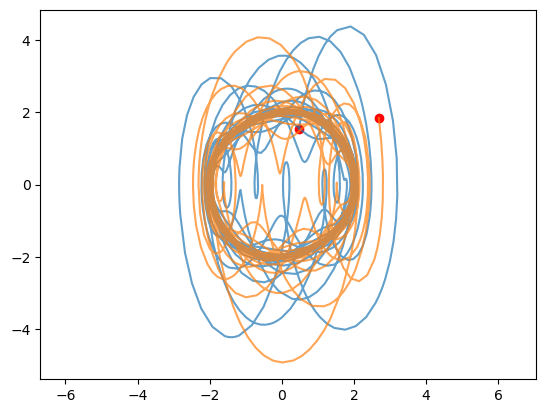

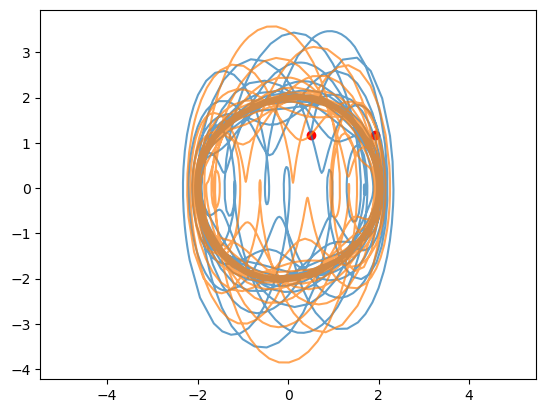

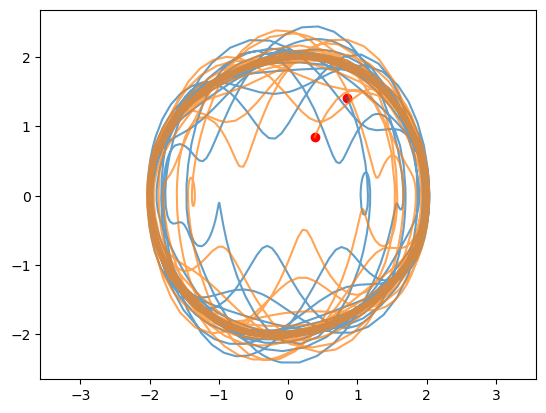

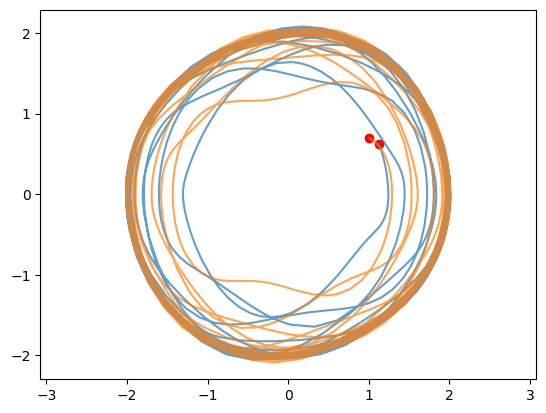

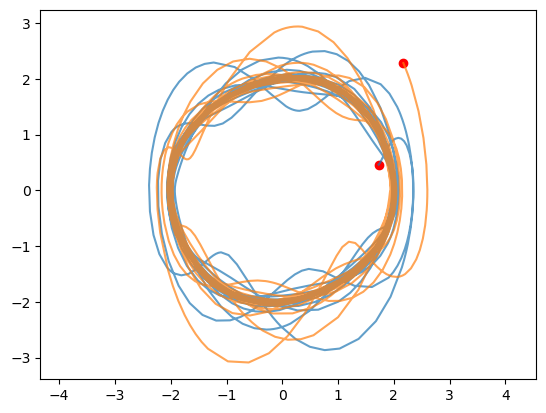

In [4]:
for i in range(len(X1_0)):
    t = sols[i].t
    X1, Y1, X2, Y2 = sols[i].y

    plt.plot(X1, Y1, alpha=0.7)
    if(i == 0):
        plt.scatter(X1_0[i], Y1_0[i], color="r", label="Conditions initiales")
    else:
        plt.scatter(X1_0[i], Y1_0[i], color="r")
    plt.axis("equal")
    #plt.show()

    plt.plot(X2, Y2, alpha=0.7)
    if(i == 0):
        plt.scatter(X2_0[i], Y2_0[i], color="r", label="Conditions initiales")
    else:
        plt.scatter(X2_0[i], Y2_0[i], color="r")
    plt.axis("equal")
    plt.show()

In [15]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'ro')

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)

ani.save(f'figs/video{datetime.datetime.now()}.mp4', fps=15, extra_args=['-vcodec', 'libx264'])
# converting to an html5 video
video = ani.to_html5_video()
  
'''
# embedding for the video
html = display.HTML(video)
  
# draw the animation
display.display(html)
plt.close()

'''